In [1]:
# Visualisation and Analysis of Global Terrorism Database
###################################################################
# Link: https://www.kaggle.com/START-UMD/gtd

In [2]:
# Import Libraries
###################################################################

import matplotlib.pyplot as plt
import matplotlib
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
import re
import io
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

# from mpl_toolkits.basemap import Basemap
from matplotlib import animation, rc
from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')

import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from scipy.misc import imread
import codecs
from subprocess import check_output
import folium 
from folium import plugins
from folium.plugins import HeatMap

import nltk

nltk.download('punkt')

nltk.download('stopwords')
import altair as alt

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import cufflinks as cf

[nltk_data] Downloading package punkt to /Users/zsiddiqa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zsiddiqa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
cf.go_offline()

In [4]:
alt.renderers.enable('notebook')


RendererRegistry.enable('notebook')

In [5]:
# Read data
###################################################################

terror = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

In [6]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
# Data exploration 
###################################################################

attackTypes =  pd.concat(objs=[terror['attacktype1_txt'], 
                                    terror['attacktype2_txt'],
                                    terror['attacktype3_txt']],
                     axis=0).reset_index(drop=True)
x = attackTypes.value_counts().index
y = attackTypes.value_counts().values

trace = go.Bar(
        x=x ,
        y=y,
        marker=dict(
            color=y,
            colorscale = 'Jet',
            reversescale = True
        ),
        name="Attack types",    
    )
layout = dict(
        title="Attack types",
        #width = 900, height = 500,
        xaxis=go.layout.XAxis(
          automargin=True),
        yaxis=dict(
            showgrid=False,
            showline=False,
            showticklabels=True,
    #         domain=[0, 0.85],
        ), 
    )
fig1 = go.Figure(data=[trace], layout=layout)
iplot(fig1)

###################################################################

weaponTypes =  pd.concat(objs=[terror['weaptype1_txt'], 
                                    terror['weaptype2_txt'],
                                    terror['weaptype3_txt'],
                                    terror['weaptype4_txt']],
                     axis=0).reset_index(drop=True)
x = weaponTypes.value_counts().index
y = weaponTypes.value_counts().values

trace1 = go.Bar(
        x=x ,
        y=y,
        marker=dict(
            color=y,
            colorscale = 'Jet',
            reversescale = True
        ),
        name="Weapons used",    
    )
layout1 = dict(
        title="Weapons used",
        xaxis=go.layout.XAxis(
          automargin=True),
        yaxis=dict(
            showgrid=False,
            showline=False,
            showticklabels=True,
    #         domain=[0, 0.85],
        ), 
    )
fig1 = go.Figure(data=[trace1], layout=layout1)
iplot(fig1)

###################################################################

targetTypes =  pd.concat(objs=[terror['targtype1_txt'], 
                                    terror['targtype3_txt'],
                                    terror['targtype3_txt']],
                     axis=0).reset_index(drop=True)
x = targetTypes.value_counts().index
y = targetTypes.value_counts().values

trace2 = go.Bar(
        x=x ,
        y=y,
        marker=dict(
            color=y,
            colorscale = 'Jet',
            reversescale = True
        ),
        name="Who sufferred the most",    
    )
layout2 = dict(
        title="Who sufferred the most",
        #width = 900, height = 500,
        xaxis=go.layout.XAxis(
          automargin=True),
        yaxis=dict(
            showgrid=False,
            showline=False,
            showticklabels=True,
    #         domain=[0, 0.85],
        ), 
    )
fig1 = go.Figure(data=[trace2], layout=layout2)
iplot(fig1)

In [8]:
# Countries with most terror attacks
###################################################################

terror_filter = terror[terror['targtype1_txt'] == "Private Citizens & Property"]
terror_count = terror_filter.groupby(['country_txt'])['targtype1_txt'].count()
countries = pd.DataFrame({'country':terror_count.index,'number':terror_count.values })
data = [dict(
    type='choropleth',
    locations=countries['country'],
    locationmode='country names',
    z=countries['number'],
    text=countries['country'],
    colorscale='Jet',
    reversescale=True,
    marker=dict(line=dict(color='rgb(180,180,180)')),
    colorbar = {'title': 'No of incidents'},
)]
layout = dict(
    title='Countries with most terror attacks',
    geo=dict(showframe=False, showcoastlines=True, projection=dict(type='mercator')),
    width=1000,
    height=1000,
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

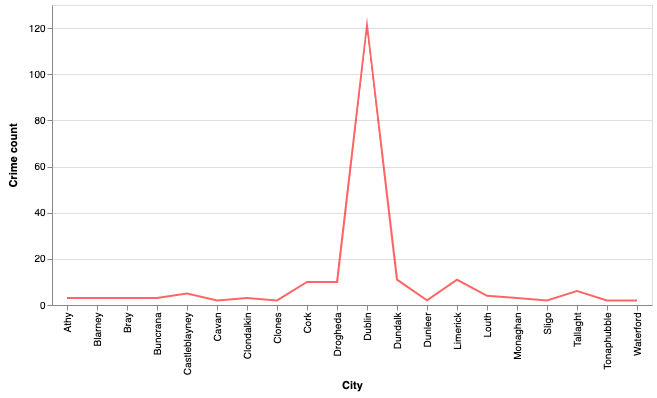

In [9]:
# Attacks in Irish Cities 
###################################################################

terror_filter = terror[terror['targtype1_txt'] == "Private Citizens & Property"]
terror_filter = terror[terror['country_txt'] == "Ireland"]
terror_filter = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter[terror_filter['city']!='Unknown' ]
data = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter.drop_duplicates(subset=None, keep='first', inplace=False)
data_city = pd.DataFrame({
    'city':data['city'].value_counts().index,
   'value':data['city'].value_counts().values
})

data1 = pd.DataFrame({'City': data_city['city'][0:20].values,
                     'Crime count': data_city['value'][0:20].values})

alt.Chart(data1).mark_line().encode(
    x='City',
    y='Crime count',
    opacity=alt.value(0.6),
    color=alt.value('red')
    
#     color= 'Origin'
).properties(width=600)

In [10]:
# Attacks in Irish Cities 
###################################################################


City_State = pd.merge(data_city, terror_filter, how='left', left_on='city', right_on='city')
City_State = City_State.drop_duplicates(subset='city', keep='first', inplace=False)
count = City_State['value'].values
m = folium.Map(location=[53.1,7.6], tiles="Mapbox Bright", zoom_start=4.5)
for i in range(0,10):
   folium.Circle(
      location=[City_State.iloc[i]['latitude'], City_State.iloc[i]['longitude']],
      #location=[20, 81],
      popup=City_State.iloc[i]['city'],
      radius=int(count[i])*300,
      color='steelblue',
      fill=True,
      fill_color='blue'
   ).add_to(m)
m

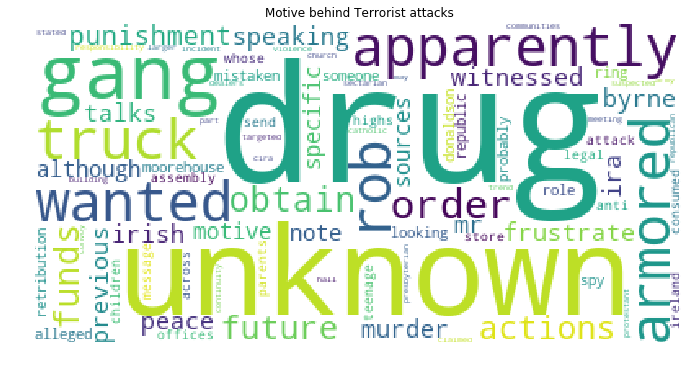

In [11]:
# Motive behind Terrorist attacks
###################################################################

terror_country = terror[terror['country_txt'] == 'Ireland']
country_motive = terror_country['motive'].str.lower().str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(country_motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(14,6)
plt.axis('off')
plt.title('Motive behind Terrorist attacks')
plt.show()

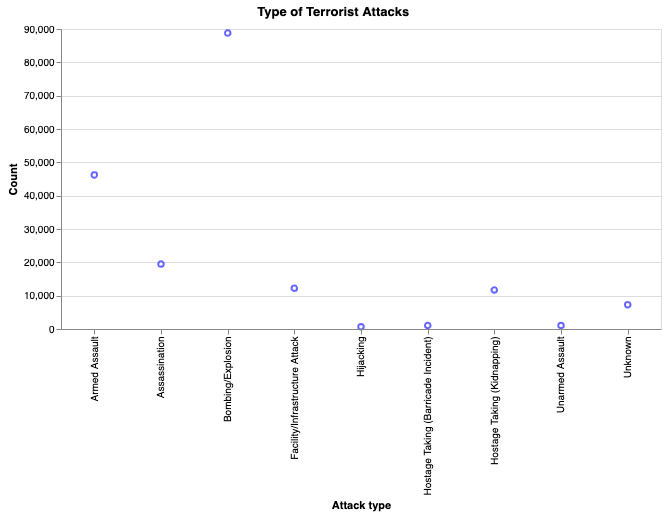

In [12]:
# Type of Terrorist Attacks
###################################################################

attackTypes =  pd.concat(objs=[terror['attacktype1_txt'], 
                                    terror['attacktype2_txt'],
                                    terror['attacktype3_txt']],
                     axis=0).reset_index(drop=True)

data2 = pd.DataFrame({'Attack type': attackTypes.value_counts().index,
                     'Count': attackTypes.value_counts().values})
alt.Chart(data2).mark_point().encode(
    x='Attack type',
    y='Count',
    opacity=alt.value(0.6),
    color=alt.value('blue')
).properties(width=600, title='Type of Terrorist Attacks')

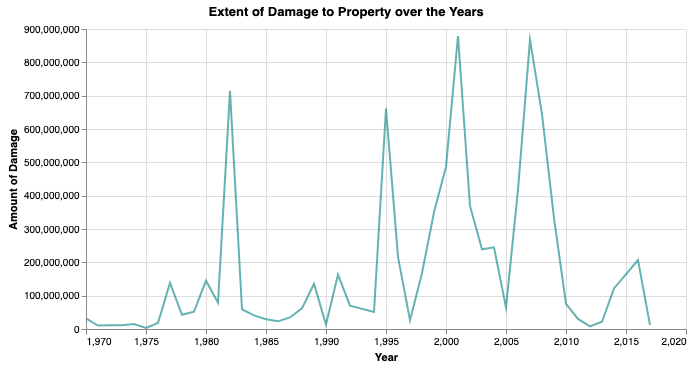

In [13]:
# Extent of Damage to Property over the Years
###################################################################

terror_filter = terror[terror['propextent_txt'] == "Major (likely >= $1 million but < $1 billion)"]
# terror_filter = terror[terror['country_txt'] == "Ireland"]
terror_filter = terror_filter[['city','gname','propvalue','iyear']]
terror_filter = terror_filter.fillna(terror_filter.propvalue.mean())
terror_filter = terror_filter.sort_values(['iyear'], ascending=False)
terror_filter = terror_filter.groupby(['iyear'])['propvalue'].sum()



source = pd.DataFrame({
  'Year': terror_filter.index,
  'Amount of Damage': terror_filter.values}
)
alt.Chart(source).mark_line().encode(
    x='Year',
    y='Amount of Damage',
    opacity=alt.value(0.6),
    color=alt.value('teal')
).properties(width=600, title='Extent of Damage to Property over the Years')

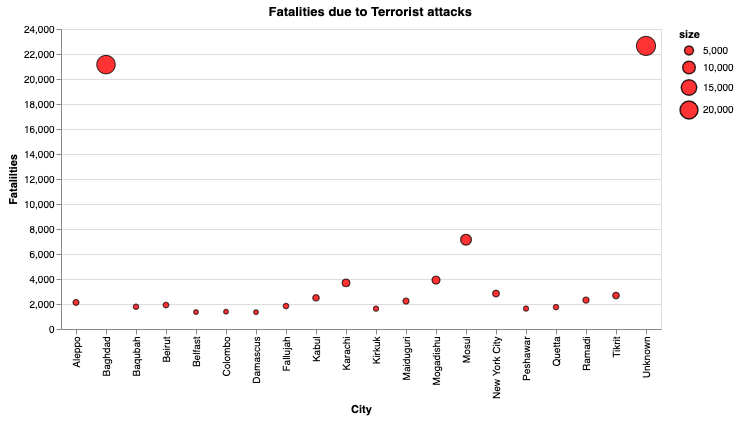

In [14]:
# Fatalities due to Terrorist attacks
###################################################################

killed_terror = terror[['city','nkill']]
terror_filter = terror[['city','latitude','longitude']]
terror_filter = terror_filter[terror_filter['city']!='Unknown' ]
data = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter.drop_duplicates(subset=None, keep='first', inplace=False)
data_city = pd.DataFrame({
    'city':killed_terror.dropna().groupby(['city'])['nkill'].sum().index,
   'value':killed_terror.dropna().groupby(['city'])['nkill'].sum().values
})

data_city = data_city.sort_values(['value'], ascending=False)


source = pd.DataFrame({
      'City': data_city['city'][0:20].values,
        'Fatalilties': data_city['value'][0:20].values,
        'size': data_city['value'][0:20]}
)

alt.Chart(source).mark_circle(
    opacity=0.8,
    stroke='black',
    strokeWidth=1
).encode(
    x='City',
    y='Fatalilties',
    size= 'size',
    opacity=alt.value(0.8),
    color=alt.value('red')
    ).properties(width=600,title='Fatalities due to Terrorist attacks')
# alt.Color('Entity:N', legend=None)




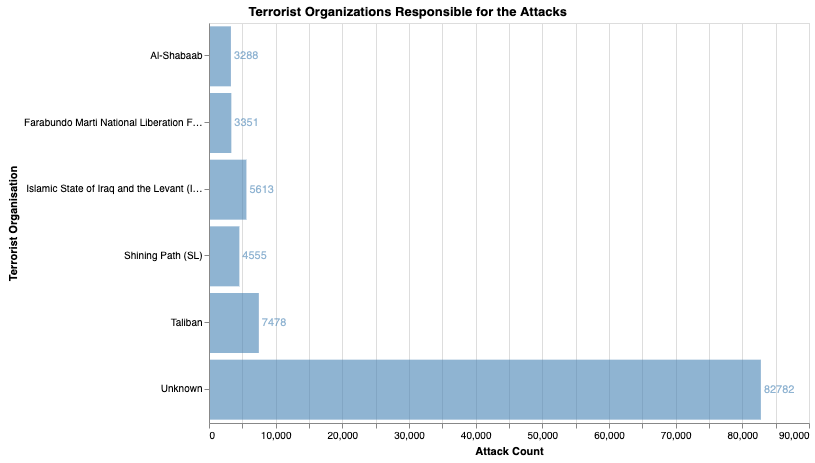

In [15]:
# Terrorist Organizations Responsible for the Attacks
###################################################################

source = pd.DataFrame({
      'x': terror['gname'].value_counts().head(6).values,
        'y': terror['gname'].value_counts().head(6).index
})

plot1=alt.Chart(source).mark_bar().encode(
    x='x',
    y='y',
    opacity=alt.value(0.6),
    color=alt.value('steelblue')
).properties(width=600,title='Terrorist Organizations Responsible for the Attacks')
text = plot1.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='x'
)
plot1.encoding.x.title = 'Attack Count'
plot1.encoding.y.title = 'Terrorist Organisation'
(plot1 + text).properties(width=600,height=400)



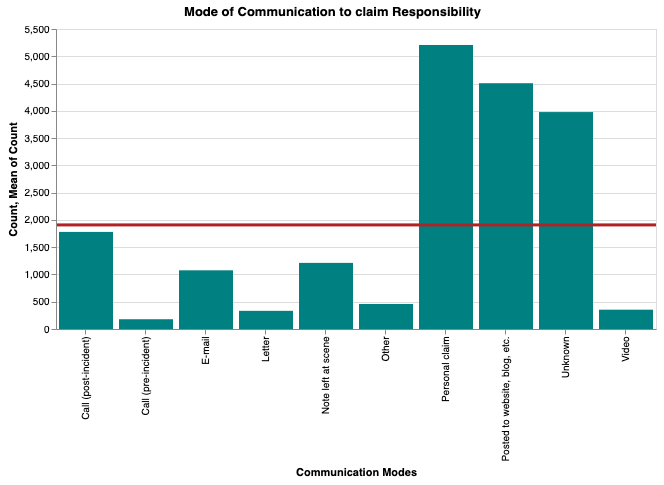

In [16]:
# Mode of Communication to claim Responsibility
###################################################################

source1 = pd.DataFrame({
      'Communication Modes': terror['claimmode_txt'].value_counts().index,
        'Count': terror['claimmode_txt'].value_counts().values
})

brush = alt.selection(type='interval', encodings=['x'])

bars = alt.Chart().mark_bar().encode(
    x='Communication Modes',
    y='Count',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.6)),
    color=alt.value('teal')
).add_selection(
    brush
).properties(width=600, title='Mode of Communication to claim Responsibility')

line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(Count)',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

alt.layer(bars, line, data=source1)

In [17]:
# Casulaties in a year
###################################################################


yearly_killed = terror.groupby(['iyear'])['nkill'].sum().reset_index()
yearly_wounded = terror.groupby(['iyear'])['nwound'].sum().reset_index()

trace = go.Bar(
    x = yearly_killed['iyear'],
    y = yearly_killed['nkill'],
    name = 'Killed',
    marker = dict(
        color = 'red'
    )
)

trace1 = go.Bar(
    x = yearly_wounded['iyear'],
    y = yearly_wounded['nwound'],
    name = 'Wounded',
    marker = dict(
        color = 'orange',
        opacity = 0.5
    )
    
)

layout = go.Layout(
    title = 'Yearly Casualities',
    xaxis = dict(
        title = 'Year'
    ),
    barmode = 'stack'
)

fig = go.Figure(data = [trace, trace1], layout = layout)
py.iplot(fig)

In [18]:
# Casualties in Europe
#########################################################

ire = terror.loc[terror['country_txt'] == 'Ireland']
uk = terror.loc[terror['country_txt'] == 'United Kingdom']
fra = terror.loc[terror['country_txt'] == 'France']
ger = terror.loc[terror['country_txt'] == 'Germany']
ita = terror.loc[terror['country_txt'] == 'Italy']
spa = terror.loc[terror['country_txt'] == 'Spain']

ire= ire.groupby('iyear')
uk = uk.groupby('iyear')
fra = fra.groupby('iyear')
ger = ger.groupby('iyear')
ita = ita.groupby('iyear')
spa = spa.groupby('iyear')

i = ire.size()
u = uk.size()
f = fra.size()
g = ger.size()
it = ita.size()
s = spa.size()

i = ire.sum()['nkill']
u = uk.sum()['nkill']
f = fra.sum()['nkill']
g = ger.sum()['nkill']
it = ita.sum()['nkill']
s = spa.sum()['nkill']

dfi = pd.DataFrame({'Ireland':i.values},index=i.index)
dfu = pd.DataFrame({'United Kingdom':u.values},index=u.index)
dff = pd.DataFrame({'France':f.values},index=f.index)
dfg = pd.DataFrame({'Germany':g.values},index=g.index)
dfit = pd.DataFrame({'Italy':it.values},index=it.index)
dfs = pd.DataFrame({'Spain':s.values},index=s.index)

result = pd.concat([dfi,dfu,dff,dfg,dfit,dfs], axis=1, join_axes=[dfi.index]).fillna(0)
result.iplot(kind='scatter')

In [19]:
# Terrorism in Europe
###################################################################

ire = terror.loc[terror['country_txt'] == 'Ireland']
uk = terror.loc[terror['country_txt'] == 'United Kingdom']
fra = terror.loc[terror['country_txt'] == 'France']
ger = terror.loc[terror['country_txt'] == 'Germany']
ita = terror.loc[terror['country_txt'] == 'Italy']
spa = terror.loc[terror['country_txt'] == 'Spain']

ire= ire.groupby('iyear')
uk = uk.groupby('iyear')
fra = fra.groupby('iyear')
ger = ger.groupby('iyear')
ita = ita.groupby('iyear')
spa = spa.groupby('iyear')

i = ire.size()
u = uk.size()
f = fra.size()
g = ger.size()
it = ita.size()
s = spa.size()

dfi = pd.DataFrame({'Ireland':i.values},index=i.index)
dfu = pd.DataFrame({'United Kingdom':u.values},index=u.index)
dff = pd.DataFrame({'France':f.values},index=f.index)
dfg = pd.DataFrame({'Germany':g.values},index=g.index)
dfit = pd.DataFrame({'Italy':it.values},index=it.index)
dfs = pd.DataFrame({'Spain':s.values},index=s.index)

result = pd.concat([dfi,dfu,dff,dfg,dfit,dfs], axis=1, join_axes=[dfi.index]).fillna(0)
result.iplot(kind='histogram')

In [20]:
# Worst terrorist attacks
###################################################################

terror['nwound'] = terror['nwound'].fillna(0).astype(int)
terror['nkill'] = terror['nkill'].fillna(0).astype(int)
terror['casualities'] = terror['nkill'] + terror['nwound']

terror = terror.sort_values(by='casualities',ascending=False)[:30]


map1=terror.pivot_table(index='country_txt',columns='iyear',values='casualities')
map1.fillna(0,inplace=True)


heatmap = go.Heatmap(
    z=map1.as_matrix(), 
    x=map1.columns, 
    y=map1.index, 
    colorscale='Viridis')

data = [heatmap]
layout = go.Layout(
    title='Worst Terror Attacks',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [21]:
# Worst Terrorism Countries
###################################################################

terror_df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

terror_df['casualities'] = terror_df['nkill'] + terror_df['nwound']

terror_bubble_df = terror_df[(terror_df['gname'] != 'Unknown') & (terror_df['casualities'] > 50)]

terror_bubble_df = terror_bubble_df.sort_values(['region_txt', 'country_txt'])

terror_bubble_df.isnull().sum()

terror_bubble_df = terror_bubble_df.drop(['latitude','longitude','summary','motive','target1'],axis=1)

terror_bubble_df = terror_bubble_df.dropna(subset=['city'])

terror_bubble_df.isnull().sum()

hover_text = []
for index, row in terror_bubble_df.iterrows():
    hover_text.append(('City: {city}<br>'+
                      'gname: {group}<br>'+
                      'casualities: {casualities}<br>'+
                      'iyear: {year}').format(city=row['city'],
                                            group=row['gname'],
                                            casualities=row['casualities'],
                                            year=row['iyear']))
terror_bubble_df['text'] = hover_text

trace0 = go.Scatter(
    x=terror_bubble_df['iyear'][terror_bubble_df['country_txt'] == 'Iraq'],
    y=terror_bubble_df['casualities'][terror_bubble_df['country_txt'] == 'Iraq'],
    mode='markers',
    name='Iraq',
    text=terror_bubble_df['text'][terror_bubble_df['country_txt'] == 'Iraq'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualities'][terror_bubble_df['country_txt'] == 'Iraq'],
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=terror_bubble_df['iyear'][terror_bubble_df['country_txt'] == 'Pakistan'],
    y=terror_bubble_df['casualities'][terror_bubble_df['country_txt'] == 'Pakistan'],
    mode='markers',
    name='Pakistan',
    text=terror_bubble_df['text'][terror_bubble_df['country_txt'] == 'Pakistan'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualities'][terror_bubble_df['country_txt'] == 'Pakistan'],
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=terror_bubble_df['iyear'][terror_bubble_df['country_txt'] == 'Afghanistan'],
    y=terror_bubble_df['casualities'][terror_bubble_df['country_txt'] == 'Afghanistan'],
    mode='markers',
    name='Afghanistan',
    text=terror_bubble_df['text'][terror_bubble_df['country_txt'] == 'Afghanistan'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualities'][terror_bubble_df['country_txt'] == 'Afghanistan'],
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=terror_bubble_df['iyear'][terror_bubble_df['country_txt'] == 'India'],
    y=terror_bubble_df['casualities'][terror_bubble_df['country_txt'] == 'India'],
    mode='markers',
    name='India',
    text=terror_bubble_df['text'][terror_bubble_df['country_txt'] == 'India'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualities'][terror_bubble_df['country_txt'] == 'India'],
        line=dict(
            width=2
        ),
    )
)

data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
         title = 'Worst Terrorism Countries',
         xaxis = dict(
             title = 'Year',
             #type = 'log',
             range = [1976,2016],
             tickmode = 'auto',
             nticks = 30,
             showline = True,
             showgrid = False
             ),
         paper_bgcolor='rgb(243, 243, 243)',
         plot_bgcolor='rgb(243, 243, 243)',
         )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Terrorism Bubble')